In [219]:
import pandas as pd
import datetime
bikes = pd.read_csv('data.csv', index_col=0)
bikes['prices'] = [x.replace('.', '') for x in bikes['prices']]
bikes['prices'] = [x.replace(',', '.') for x in bikes['prices']]
bikes['prices'] = bikes['prices'].astype(float)
bikes.prices.agg(['sum', 'count']).head()
bikes.head(500)
# bikes.info()
# bikes.columns.values

,fiets,prices,url,timestamp
0,CubeTouring Pro 2018,599.0,https://www.12gobiking.nl/cube-touring-pro-2018,14/08/2019 10:47
1,PegasusPiazza 21v 2019,849.0,https://www.12gobiking.nl/pegasus-piazza-21v-2019,14/08/2019 10:47
2,PegasusPremio SL Belt 8V 2018,1049.0,https://www.12gobiking.nl/pegasus-premio-sl-be...,14/08/2019 10:47
3,CubeTravel SL 2018,799.0,https://www.12gobiking.nl/cube-travel-sl-2018-...,14/08/2019 10:47
4,GazelleUltimate T30 2018 | Premium,999.0,https://www.12gobiking.nl/gazelle-ultimate-t30...,14/08/2019 10:47
5,TrekL500 2019,999.0,https://www.12gobiking.nl/trek-l500-2019,14/08/2019 10:47
6,PegasusPremio SL Disc Belt 8v 2019,999.0,https://www.12gobiking.nl/pegasus-premio-sl-di...,14/08/2019 10:47
7,FocusPlanet 6.8 2019,859.0,https://www.12gobiking.nl/focus-planet-6-8-2019,14/08/2019 10:47
8,BatavusZonar Comfort 27v 2019,599.0,https://www.12gobiking.nl/batavus-zonar-comfor...,14/08/2019 10:47
9,PegasusSolero SL Disc 24 2019,599.0,https://www.12gobiking.nl/pegasus-solero-sl-di...,14/08/2019 10:47


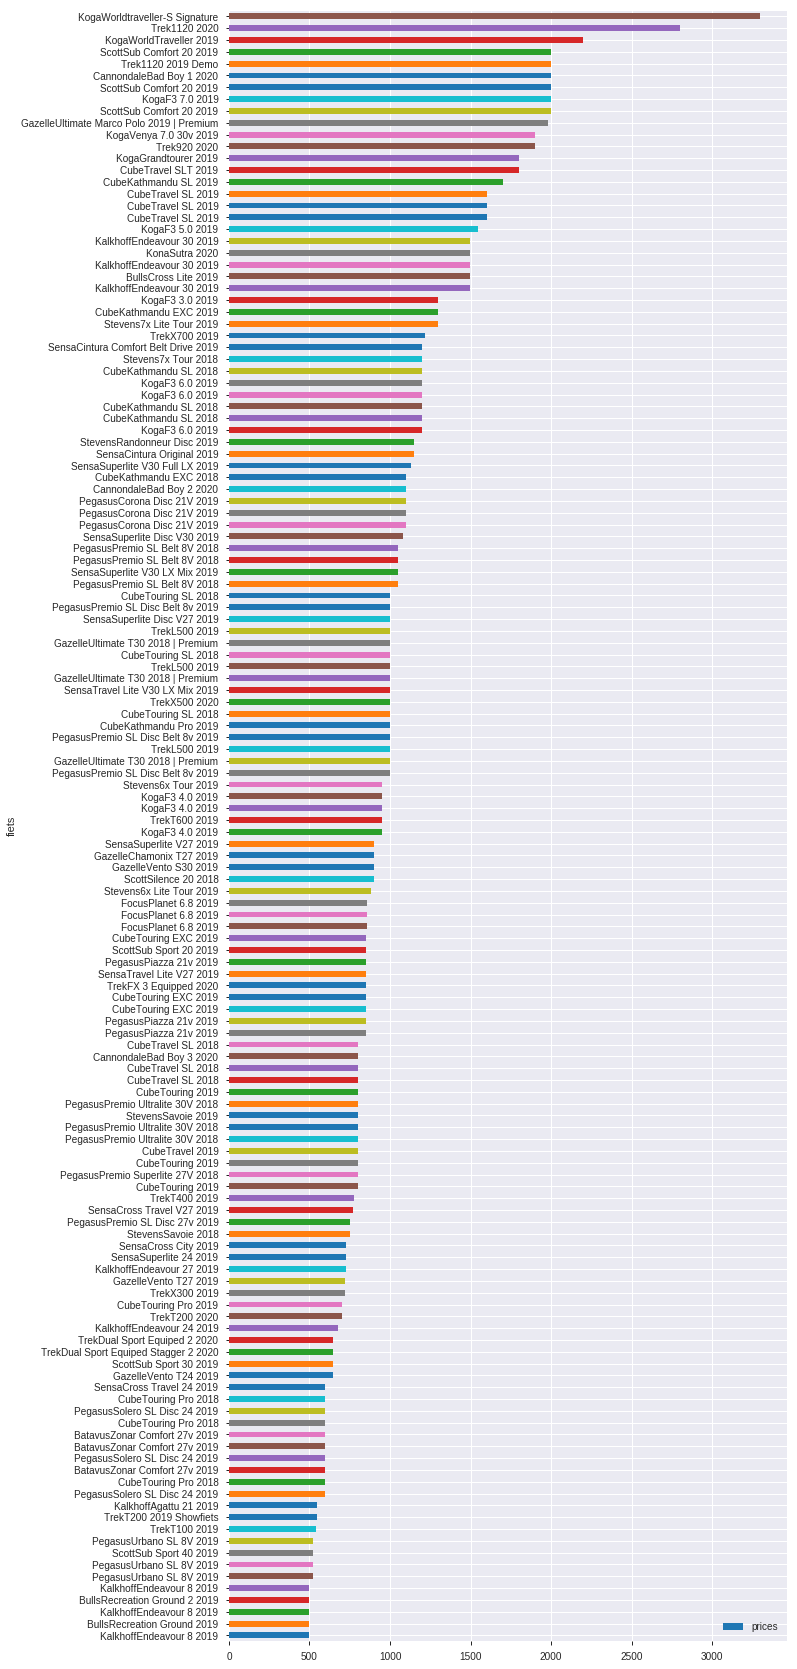

In [240]:
bikes = bikes.sort_values('prices',ascending=True)
bikes.prices.agg(['mean', 'count']).head()
bikes.plot(kind='barh',  figsize=(10, 30), x='fiets', y='prices')

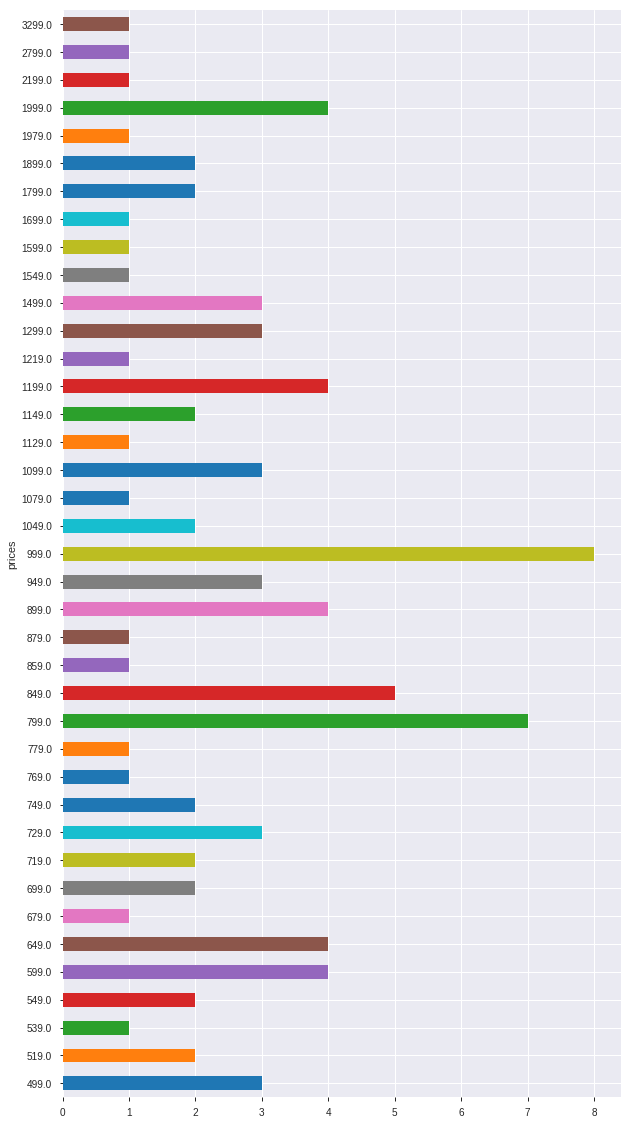

In [334]:
import matplotlib.pyplot as plt
import pandas as pd

# bikes = bikes.sort_values('prices')
bikes.groupby('prices')['fiets'].nunique().plot(kind='barh',figsize=(10, 20))
plt.show()

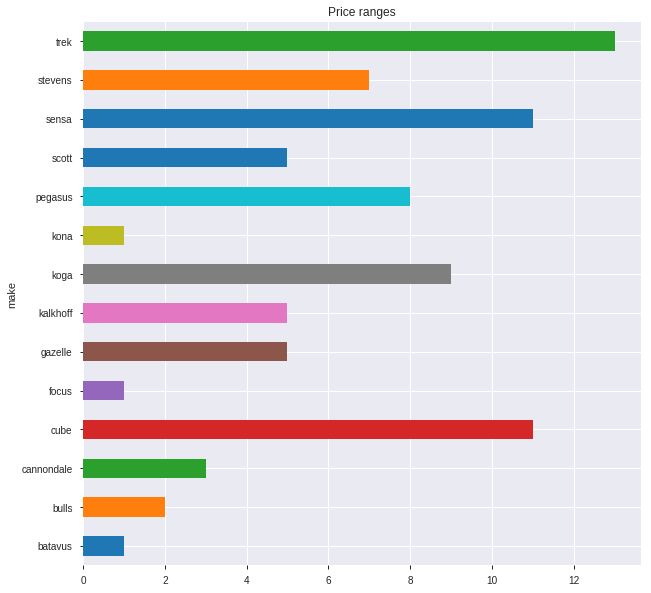

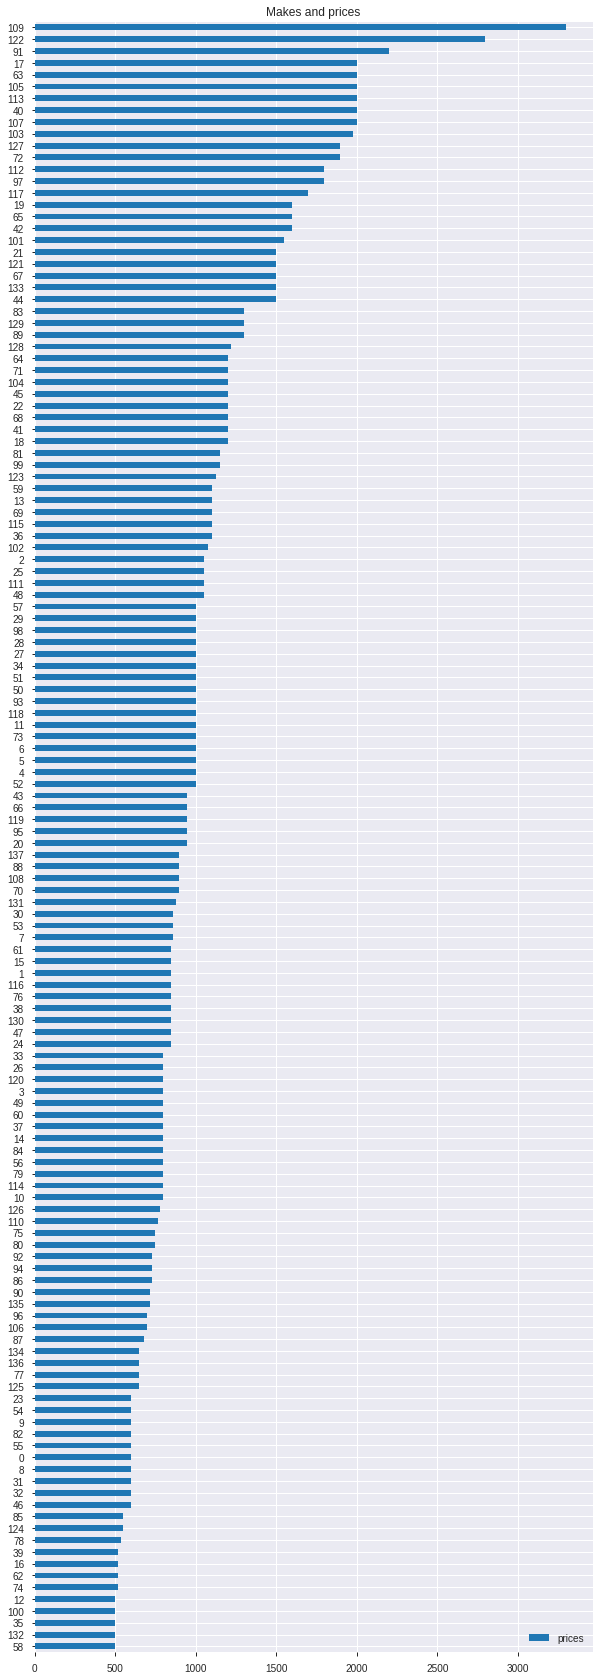

In [302]:
import matplotlib.pylab as plt

df = bikes
df
# df_new = bikes['fiets'].str.split(' ', n = 1, expand = True)
# df_new
df_new['url'] = df['url'].str.replace('https://www.12gobiking.nl/','')
df_new = df_new['url'].str.split('-', n = 1, expand = True)
df_new
df_new.columns = ['make', 'type']

df = pd.concat([df, df_new], axis='columns')
df = df.sort_values('prices', ascending=False)
# df.info()
# df.plot(kind='barh', x='make',figsize=(10, 30),title='Count of bike Makes')
df.groupby('make')['prices'].nunique().plot(kind='barh', x='prices', y='make', figsize=(10, 10), title='Price ranges')
df[['make','prices']].sort_values(by='prices',ascending=True).plot(kind='barh',stacked=False, figsize=(10, 30),title='Makes and prices')

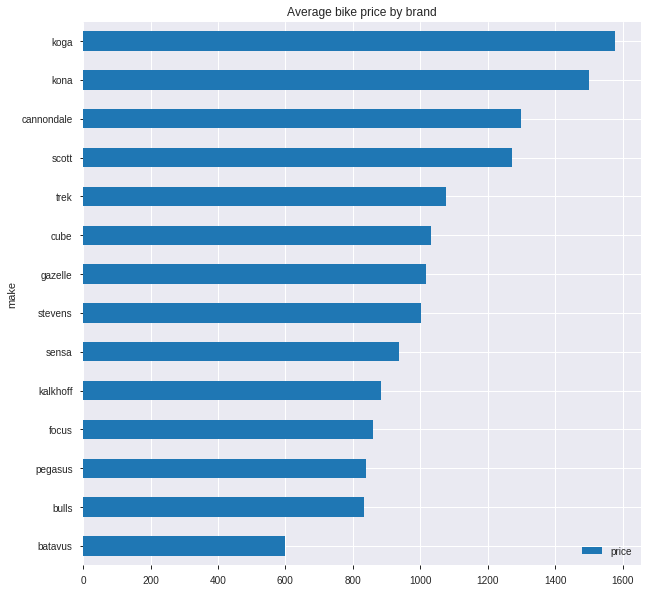

In [341]:
import seaborn as sns
# df.sort_values('prices', ascending=False)[['make','prices']].plot.bar(stacked=True, rot=0)
df_2 = df.groupby('make').mean()
df_2.columns = ['price']
df_2.sort_values('price', ascending=True).plot(kind='barh',figsize=(10, 10), title='Average bike price by brand')
# df.groupby('make').prices.value_counts('make').unstack(0).plot.barh(figsize=(10, 20))
# sns.barplot(data=df_2);
